## Project 3 (M11): Data Aggregation, Grouping, Reshaping & Analysis

### Group Members: Meher Venkat Karri, Mamatha Singh, Manvitha Karanam 

# Introduction

In this project, we aim to analyze a dataset obtained from 538.com, focusing on air travel habits and preferences of the general public. By examining demographic information and survey responses, we aim to provide insights that can facilitate decision-making within the airline industry. The analysis will help identify patterns and preferences among different groups of travelers, which can be valuable for improving engagement strategies.

Understanding the demographic composition of travelers, their attitudes towards various aspects of air travel, and their preferences for in-flight behaviors can provide valuable insights for major airlines. By gaining deeper insights into the needs and preferences of their passengers, airlines can enhance their services, improve engagement strategies, and ultimately strengthen their competitive advantage in the market.

It is intended that the research will benefit major airline stakeholders in a number of ways:

- **Improved Customer Experience:** Airlines can adjust in-flight policies, services, and communications to better suit the requirements and preferences of their varied clientele by learning the nuances of passengers' expectations and politeness preferences.
- **Targeted Service Offerings:** Better categorisation and the creation of customised service improvements will be made possible by insights into the demographic diversity of passenger mindsets. This might raise satisfaction levels among important customer segments.
- **Making Informed Decisions:** The results will offer a statistical basis for decision-making concerning in-flight experience management, which could have an impact on anything from cabin staff training procedures to seat design.
- **Competitive Advantage:** Gaining a competitive edge in a market where differentiation is crucial can be achieved by utilising detailed consumer information to enhance the in-flight experience. This can lead to increased customer loyalty and a favourable brand image.





# Data Loading and Manipulation

Loading the dataset from a major airline is the first step in our study, which aims to understand passenger behaviour and preferences for in-flight manners. The collection contains important demographic data as well as answers to a range of scenarios that travellers may experience. The procedures outlined here address the loading, cleaning, and manipulation of data required to get the dataset ready for exploratory data analysis (EDA) and additional research.






### Step 1: Loading the Dataset

First, we load the dataset into a Pandas DataFrame. This dataset is hosted on a GitHub repository, making it accessible for direct loading using Pandas 'read_csv' function.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the dataset from the provided Github link
data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv")

In [3]:
data.head(10)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific
7,3434218031,Once a year or less,Once in a while,"6'0""",Yes,The arm rests should be shared,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,New England
8,3434213681,Once a year or less,Once in a while,"6'0""",Yes,The arm rests should be shared,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3434172894,Once a year or less,Never,"5'6""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"Yes, very rude","Yes, very rude",...,"Yes, very rude","Yes, very rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor d

### Step 2: Creating a Demographic DataFrame

To analyze responses based on demographic factors, we extract demographic information into a separate DataFrame. This includes 'RespondentID' for identification, alongside 'Gender', 'Age', 'Household Income', 'Education', and 'Location (Census Region)'.

In [4]:
#create a new dataframe with variable as demographic data
demographic_data = data[['RespondentID', 'Gender', 'Age', 'How tall are you?','Household Income', 'Education', 'Location (Census Region)']].copy()

demographic_data_columns = ['respondent_id', 'gender', 'age', 'household_income', 'education', 'location']

In [5]:
demographic_data

,RespondentID,Gender,Age,How tall are you?,Household Income,Education,Location (Census Region)
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Male,30-44,"6'3""",NaN,Graduate degree,Pacific
2,3434275578,Male,30-44,"5'8""","$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Male,30-44,"5'11""","$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Male,30-44,"5'7""","$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...
1035,3431732652,Male,30-44,"5'7""","$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,Male,45-60,NaN,150000,Bachelor degree,Pacific
1037,3431731485,Female,> 60,NaN,NaN,Some college or Associate degree,East North Central
1038,3431731196,Female,30-44,NaN,"$50,000 - $99,999",Bachelor degree,New England


### Step 3: Height Conversion to Centimeters

The data includes height in feet and inches. To standardize this, we convert height to centimeters.

The conversion function convert_to_cm handles special cases for heights '6'6" and above' and 'Under 5 ft.', converting them to 6 feet 6 inches and 4 feet 10 inches respectively. For all other values, it splits the string into feet and inches and converts them into centimeters. If the string format is unexpected and doesn't match the feet and inches format, it returns np.nan.

The new column 'height in cm' in the demographic_data DataFrame will contain the height in centimeters once the conversion is applied. 

In [6]:
import numpy as np

def convert_to_cm(height):
    if height == '6\'6" and above':
        # Assuming 6'6" for "6'6" and above"
        feet, inches = 6, 6
    elif height == 'Under 5 ft.':
        # Assuming 4'10" for "Under 5 ft."
        feet, inches = 4, 10
    else:
        try:
            
            parts = height.split('\'')
            feet = int(parts[0])
            inches = int(parts[1].replace('"', ''))
        except:
            return np.nan  # For unexpected formats
            
    return round((feet * 30.48) + (inches * 2.54), 2)

demographic_data['Height in cm'] = demographic_data['How tall are you?'].apply(convert_to_cm)

In [7]:
demographic_data['How tall are you?']

0         NaN
1        6'3"
2        5'8"
3       5'11"
4        5'7"
        ...  
1035     5'7"
1036      NaN
1037      NaN
1038      NaN
1039     6'3"
Name: How tall are you?, Length: 1040, dtype: object

In [8]:
demographic_data

,RespondentID,Gender,Age,How tall are you?,Household Income,Education,Location (Census Region),Height in cm
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Male,30-44,"6'3""",NaN,Graduate degree,Pacific,190.50
2,3434275578,Male,30-44,"5'8""","$100,000 - $149,999",Bachelor degree,Pacific,172.72
3,3434268208,Male,30-44,"5'11""","$0 - $24,999",Bachelor degree,Pacific,180.34
4,3434250245,Male,30-44,"5'7""","$50,000 - $99,999",Bachelor degree,Pacific,170.18
...,...,...,...,...,...,...,...,...
1035,3431732652,Male,30-44,"5'7""","$0 - $24,999",Some college or Associate degree,East North Central,170.18
1036,3431731770,Male,45-60,NaN,150000,Bachelor degree,Pacific,NaN
1037,3431731485,Female,> 60,NaN,NaN,Some college or Associate degree,East North Central,NaN
1038,3431731196,Female,30-44,NaN,"$50,000 - $99,999",Bachelor degree,New England,NaN


### Step 4: Standardize Column Names & Creating Non-Demographic DataFrame

- To adhere to best practices for naming in Pandas, we convert all column names to lowercase and replace spaces with underscores. This standardization facilitates easier access and manipulation of the dataset columns in subsequent analyses.
- Using the identified columns, we construct a new DataFrame that includes only the non-demographic data. We ensure that the 'RespondentID' column is included for respondent identification.


In [9]:
# Identify non-demographic columns (assuming they're all other columns)
non_demographic_columns = [columns for columns in data.columns if columns not in demographic_data.columns]
# Create a new DataFrame with the RespondentID
non_demographic_data = data[['RespondentID'] + non_demographic_columns].copy()
#Renaming the columns
non_demographic_data.columns = non_demographic_data.columns.str.lower().str.replace(' ', '_')

In [10]:
non_demographic_data

,respondentid,how_often_do_you_travel_by_plane?,do_you_ever_recline_your_seat_when_you_fly?,do_you_have_any_children_under_18?,"in_a_row_of_three_seats,_who_should_get_to_use_the_two_arm_rests?","in_a_row_of_two_seats,_who_should_get_to_use_the_middle_arm_rest?",who_should_have_control_over_the_window_shade?,is_itrude_to_move_to_an_unsold_seat_on_a_plane?,"generally_speaking,_is_it_rude_to_say_more_than_a_few_words_tothe_stranger_sitting_next_to_you_on_a_plane?","on_a_6_hour_flight_from_nyc_to_la,_how_many_times_is_it_acceptable_to_get_up_if_you're_not_in_an_aisle_seat?",...,is_itrude_to_recline_your_seat_on_a_plane?,"given_the_opportunity,_would_you_eliminate_the_possibility_of_reclining_seats_on_planes_entirely?",is_it_rude_to_ask_someone_to_switch_seats_with_you_in_order_to_be_closer_to_friends?,is_itrude_to_ask_someone_to_switch_seats_with_you_in_order_to_be_closer_to_family?,is_it_rude_to_wake_a_passenger_up_if_you_are_trying_to_go_to_the_bathroom?,is_itrude_to_wake_a_passenger_up_if_you_are_trying_to_walk_around?,"in_general,_is_itrude_to_bring_a_baby_on_a_plane?","in_general,_is_it_rude_to_knowingly_bring_unruly_children_on_a_plane?",have_you_ever_used_personal_electronics_during_take_off_or_landing_in_violation_of_a_flight_attendant's_direction?,have_you_ever_smoked_a_cigarette_in_an_airplane_bathroom_when_it_was_against_the_rules?
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"Yes, somewhat rude",No,"No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude",No,No
2,3434275578,Once a year or less,Usually,No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",Three times,...,"No, not rude at all",No,"No, not at all rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No
3,3434268208,Once a year or less,Always,No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"No, not rude at all",No,"Yes, somewhat rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No
4,3434250245,Once a month or less,About half the time,No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"No, not rude at all",No,"No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,3431732652,Once a year or less,Once in a while,No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"Yes, somewhat rude",No,"No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, very rude",No,No
1036,3431731770,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5: Tidying the Non-Demographic Data

For analysis, we convert the non-demographic data into a tidy format, where each row corresponds to a single response.

The DataFrame to be melted:
- id_vars: a list of columns that we want to keep (not melt). In this case, it's the 'respondentid' which uniquely identifies each respondent's answers.
- var_name: the name of the new column in the melted DataFrame that will hold the names of the melted columns from the original DataFrame (i.e., the survey questions).
- value_name: the name of the new column in the melted DataFrame that will hold the values from the melted columns of the original DataFrame (i.e., the survey responses).


In [11]:
# Convert non-demographic data to tidy long format
tidy_data = pd.melt(non_demographic_data, id_vars=['respondentid'], var_name='question', value_name='response')

In [12]:
tidy_data.head(20)

,respondentid,question,response
0,3436139758,how_often_do_you_travel_by_plane?,Once a year or less
1,3434278696,how_often_do_you_travel_by_plane?,Once a year or less
2,3434275578,how_often_do_you_travel_by_plane?,Once a year or less
3,3434268208,how_often_do_you_travel_by_plane?,Once a year or less
4,3434250245,how_often_do_you_travel_by_plane?,Once a month or less
5,3434245875,how_often_do_you_travel_by_plane?,Once a year or less
6,3434235351,how_often_do_you_travel_by_plane?,Once a month or less
7,3434218031,how_often_do_you_travel_by_plane?,Once a year or less
8,3434213681,how_often_do_you_travel_by_plane?,Once a year or less
9,3434172894,how_often_do_you_travel_by_plane?,Once a year or less


### Step 6: Identifying Flying Frequency

We add a new column to the demographic DataFrame to indicate flying frequency, categorizing respondents as 'Never fly' or 'Sometimes/Always fly'.

The process begins by aligning the RespondentID of both the demographic dataset and the original survey dataset to ensure that each respondent's flying status is correctly matched to their demographic profile. This is achieved by setting RespondentID as the index in both dataframes, facilitating a direct mapping of responses.

The core of this operation involves applying a conditional logic to the flight frequency responses. If a respondent's answer contains the word 'Never', indicating they never fly, their flies_status is marked as 'Never'. Otherwise, it is assumed they fly at least sometimes, marking their status as 'Sometimes/Always'. This logic is encapsulated in a lambda function applied across the flight frequency responses.

After the categorization is complete, the index is reset to revert RespondentID back to a column, maintaining the dataframe's structural integrity and ensuring compatibility with subsequent analysis.

In [13]:
#Add a column indicating flies_status
demographic_data = demographic_data.set_index('RespondentID')
demographic_data['flies_status'] = data.set_index('RespondentID')['How often do you travel by plane?'].apply(lambda x: 'Never' if 'Never' in x else 'Sometimes/Always')
demographic_data.reset_index(inplace=True)

In [14]:
demographic_data

,RespondentID,Gender,Age,How tall are you?,Household Income,Education,Location (Census Region),Height in cm,flies_status
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes/Always
1,3434278696,Male,30-44,"6'3""",NaN,Graduate degree,Pacific,190.50,Sometimes/Always
2,3434275578,Male,30-44,"5'8""","$100,000 - $149,999",Bachelor degree,Pacific,172.72,Sometimes/Always
3,3434268208,Male,30-44,"5'11""","$0 - $24,999",Bachelor degree,Pacific,180.34,Sometimes/Always
4,3434250245,Male,30-44,"5'7""","$50,000 - $99,999",Bachelor degree,Pacific,170.18,Sometimes/Always
...,...,...,...,...,...,...,...,...,...
1035,3431732652,Male,30-44,"5'7""","$0 - $24,999",Some college or Associate degree,East North Central,170.18,Sometimes/Always
1036,3431731770,Male,45-60,NaN,150000,Bachelor degree,Pacific,NaN,Never
1037,3431731485,Female,> 60,NaN,NaN,Some college or Associate degree,East North Central,NaN,Never
1038,3431731196,Female,30-44,NaN,"$50,000 - $99,999",Bachelor degree,New England,NaN,Never


# Step 7: Exploratory Data Analysis

In the exploratory data analysis (EDA), we leverage both statistical and graphical techniques to analyze the demographics of survey respondents.

In [15]:
demographic_data.describe()

,RespondentID,Height in cm
count,1.040000e+03,858.000000
mean,3.432711e+09,171.304942
std,6.104183e+05,10.149511
min,3.431730e+09,147.320000
25%,3.432265e+09,162.560000
50%,3.432672e+09,170.180000
75%,3.433153e+09,177.800000
max,3.436140e+09,198.120000


In [16]:
demographic_data['Gender'].value_counts()

Gender
Female    528
Male      479
Name: count, dtype: int64

In [17]:
demographic_data['flies_status'].value_counts()

flies_status
Sometimes/Always    874
Never               166
Name: count, dtype: int64

- We start by examining the age distribution of our respondents. Employing a histogram allows us to visualize the spread of ages within our dataset. This visualization helps in understanding whether our sample skews towards a particular age group, which is crucial for assessing the representativeness of our survey responses.
- Next, we pivot to analyzing the gender distribution among the survey participants. A count plot serves as an effective tool for showcasing the prevalence of each gender within our dataset. This step is essential to ensure that our analysis does not inadvertently lean towards a specific gender.
- Another critical aspect we explore is the respondents' flying frequency, categorized into 'Never' and 'Sometimes'. By assessing the distribution of these categories, we can gauge the overall inclination towards flying among our survey participants.

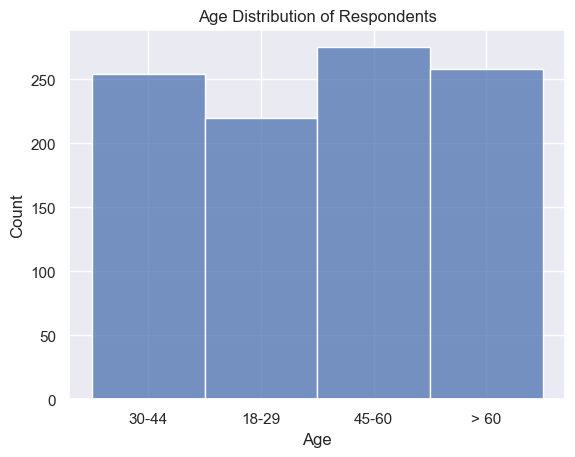

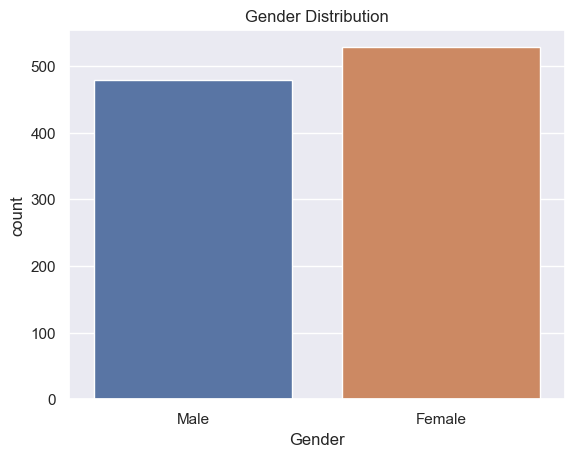

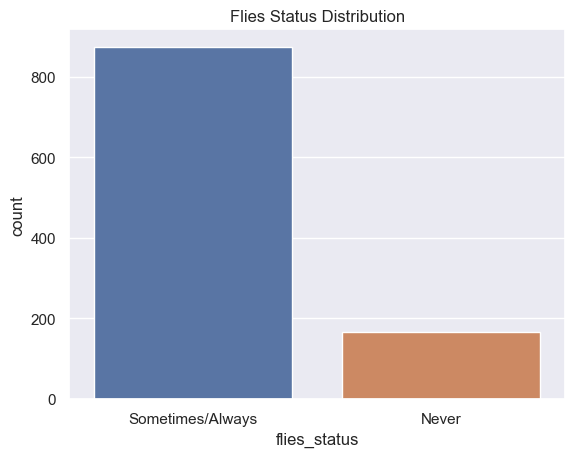

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=demographic_data, x='Age', bins=40)
plt.title('Age Distribution of Respondents')
plt.show()

sns.countplot(x='Gender', data=demographic_data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='flies_status', data=demographic_data)
plt.title('Flies Status Distribution')
plt.show()

#### Age Distribution of Respondents
- The x-axis represents age, and the y-axis represents frequency (number of respondents).
- The distribution of the survey captured responses from a diverse age range.
- Interpretation:
The bars are approximately equal in height, with the highest frequency observed around 200-250 respondents.

#### Gender Distribution
- The x-axis represents different gender categories. The bars likely represent male and female respondents.
- The “Female” bar is taller, reaching close to 500 on the count axis. The “Male” bar is shorter, extending just above 400 on the count axis.
- Interpretation:
The survey appears to have more female respondents than male respondents.

#### Flies Status Distribution
- The x-axis represents different flies status categories.
- The bars represent the frequency (number of respondents) in each category.
- Interpretation:
We can infer that the majority of respondents fall into the “never flown” or “occasional flyer” categories.


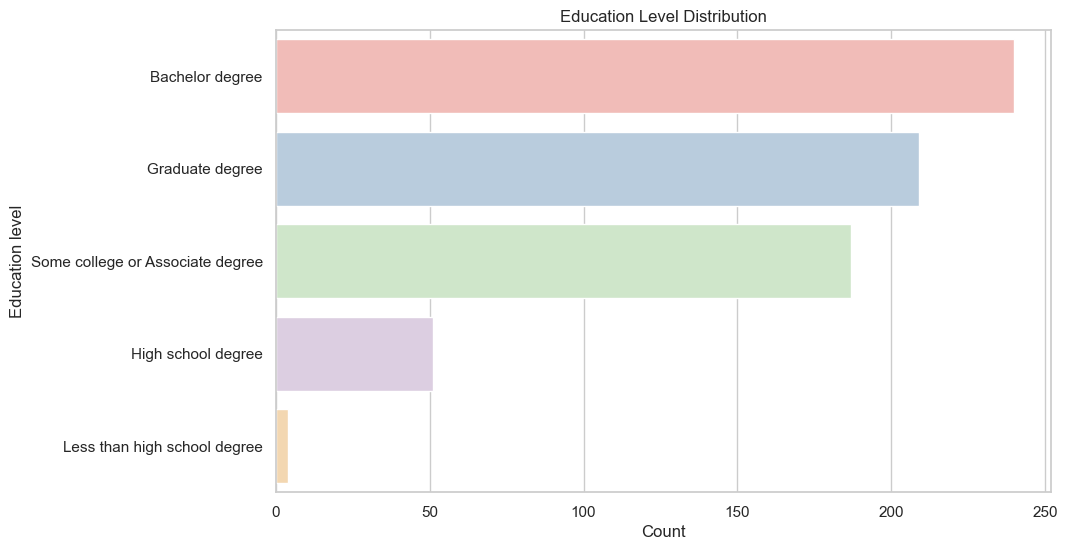

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Education', data=demographic_data_cleaned, palette='Pastel1')
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education level')
plt.show()

From the graph, we can infer the following:

**Bachelor's Degree:** This category has the highest count among respondents, suggesting that individuals with a bachelor's degree are well-represented in the survey population.

**Graduate Degree**: The second most common education level is a graduate degree, indicating a significant representation of respondents with advanced education.

**Some College or Associate Degree:** This group is the third most common in the survey, with fewer individuals than those with a bachelor's or graduate degree, but still a notable segment.

**High School Degree:** Respondents with only a high school degree form a smaller group compared to the previous categories.

**Less Than High School Degree:** This category has the fewest respondents, indicating that individuals with less than a high school education are the least represented in the survey.

With a majority having at least some college degree or above, the distribution shows that the survey sample may tilt towards a more educated population. This could mean that those with higher levels of education had a greater influence on the responses, which could have an impact on their travel patterns, preferences, and views on proper conduct when flying.Additionally, the airline may consider how to better engage and cater to less represented groups, such as those with a high school education or less, to ensure inclusivity and broaden their customer base.



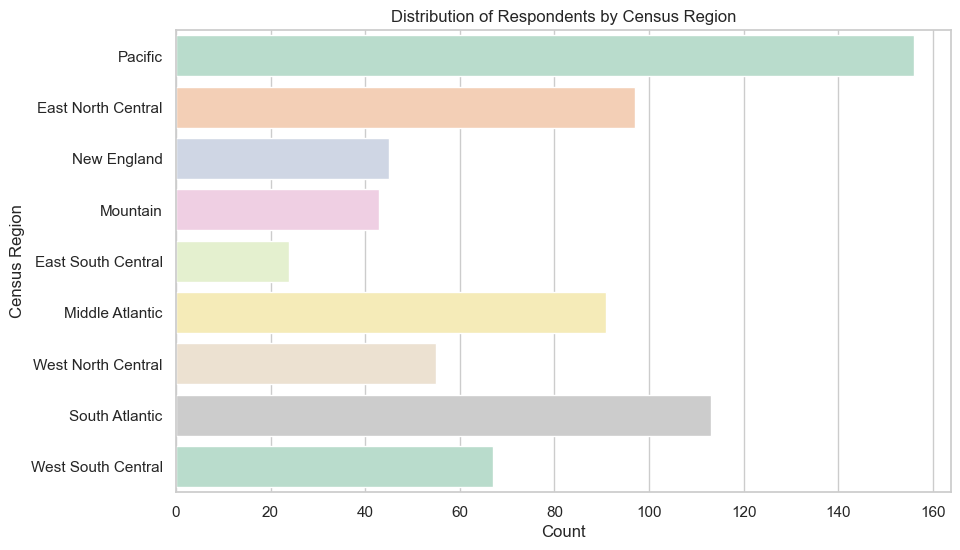

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Location (Census Region)', data=demographic_data_cleaned, palette='Pastel2')
plt.title('Distribution of Respondents by Census Region')
plt.xlabel('Count')
plt.ylabel('Census Region')
plt.show()


**Pacific Region:** This region appears to have the highest number of respondents, indicating a significant portion of the survey participants are from this area. This could suggest that the Pacific region's population is either more engaged in surveys or possibly travels more frequently, making them more interested in participating.

**South Atlantic and Middle Atlantic:** These regions seem to have the next highest counts, showing that they are also well-represented in the survey. The substantial number of respondents from these regions could be due to a combination of factors, such as population density and travel habits.

**East North Central and West South Central:** These regions display moderate representation among the respondents, contributing valuable insights but not as dominantly as the Pacific, South Atlantic, or Middle Atlantic regions.

- West North Central, East South Central, New England, and Mountain: The regions appear to have fewer respondents compared to others. The lower representation could affect the generalizability of the survey results to these areas.

The airline can use this regional distribution data to refine its customer service approach, route planning, and targeted marketing strategies to better serve the needs of passengers across different U.S. Census Regions.









In [61]:
# We have done further EDA for missing values in the demographic data

# Drop rows with NaN values
demographic_data_cleaned = demographic_data.dropna()

# Reset index to update serial numbers
demographic_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned demographic data
demographic_data_cleaned

,RespondentID,Gender,Age,How tall are you?,Household Income,Education,Location (Census Region),Height in cm,flies_status
0,3434275578,Male,30-44,"5'8""","$100,000 - $149,999",Bachelor degree,Pacific,172.72,Sometimes/Always
1,3434268208,Male,30-44,"5'11""","$0 - $24,999",Bachelor degree,Pacific,180.34,Sometimes/Always
2,3434250245,Male,30-44,"5'7""","$50,000 - $99,999",Bachelor degree,Pacific,170.18,Sometimes/Always
3,3434245875,Male,30-44,"5'9""","$25,000 - $49,999",Graduate degree,East North Central,175.26,Sometimes/Always
4,3434235351,Male,30-44,"6'2""",150000,Some college or Associate degree,Pacific,187.96,Sometimes/Always
...,...,...,...,...,...,...,...,...,...
686,3431737008,Female,> 60,"5'4""","$50,000 - $99,999",Graduate degree,West North Central,162.56,Sometimes/Always
687,3431735911,Female,30-44,"5'3""",150000,High school degree,Middle Atlantic,160.02,Sometimes/Always
688,3431734398,Male,30-44,"6'1""",150000,Graduate degree,Pacific,185.42,Sometimes/Always
689,3431732652,Male,30-44,"5'7""","$0 - $24,999",Some college or Associate degree,East North Central,170.18,Sometimes/Always


## Demographic Analysis: Flyers vs. Non-Flyers

 Here we compared the demographic characteristics of individuals who never fly versus those who sometimes fly

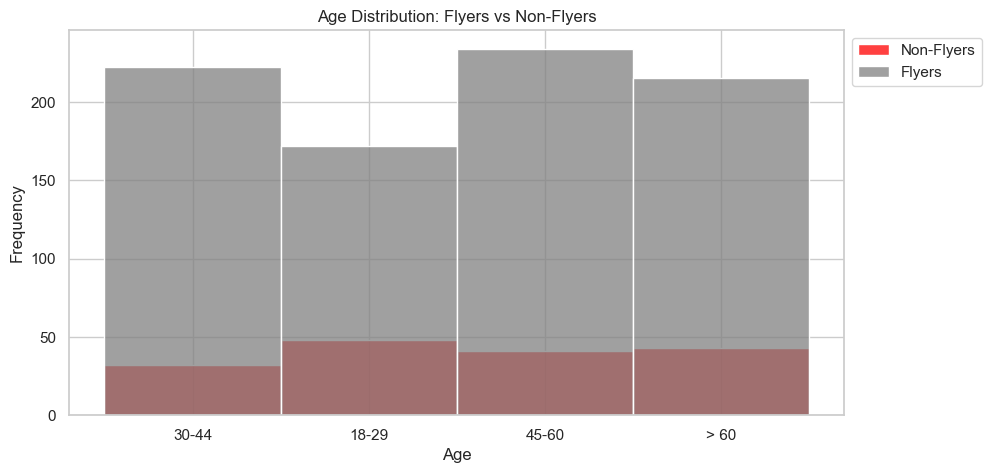

In [62]:
# Demographic comparison between flyers and non-flyers
non_flyers = demographic_data[demographic_data['flies_status'] == 'Never']
flyers = demographic_data[demographic_data['flies_status'] != 'Never']

plt.figure(figsize=(10, 5))
sns.histplot(non_flyers['Age'], color='red', label='Non-Flyers')
sns.histplot(flyers['Age'], color='grey', label='Flyers')
plt.legend(loc = 'upper left',bbox_to_anchor=(1, 1))
plt.title('Age Distribution: Flyers vs Non-Flyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- The graph titled “Age Distribution: Flyers vs Non-Flyers” illustrates the age distribution of two groups: flyers (those who have flown on an airplane) and non-flyers (those who have never flown on an airplane).
- It consists of four pairs of bars, representing different age groups: 30-44, 18-29, 45-60, and >60.
- Each pair includes a grey bar (non-flyers) and a red bar (flyers).
- The y-axis shows the frequency of individuals in each age group.
- Age plays a role in air travel behavior.
- Possible reasons for this distribution could include personal preferences, financial constraints, health considerations, or other factors.

- **Similarities:** It appears that age is the main factor influencing flying frequency because of the reasonably consistent age group distribution between flyers and non-flyers.

- **Disparties:** Nonetheless, compared to non-flyers, the '30-44' and '45-60' age categories appear to be more represented among flyers, suggesting that middle-aged persons are flying more frequently.


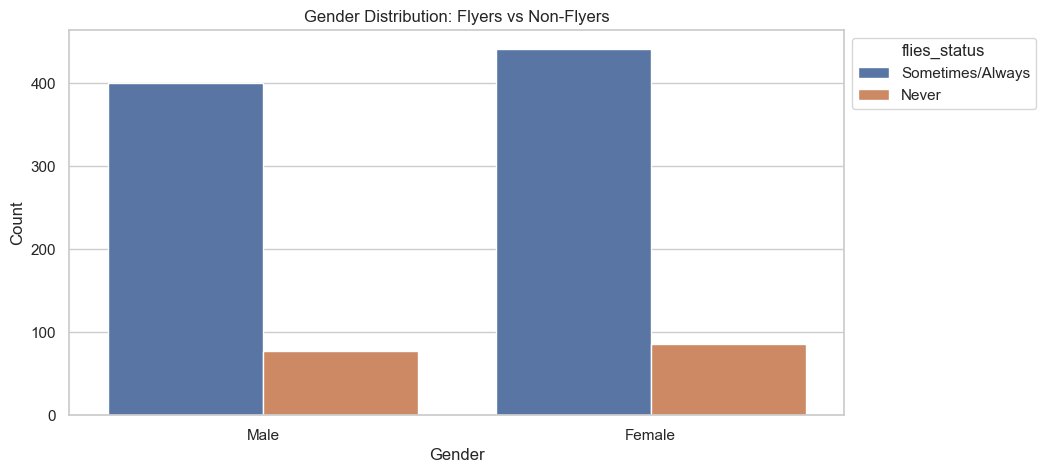

In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='flies_status', data=demographic_data)
plt.title('Gender Distribution: Flyers vs Non-Flyers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='flies_status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

It displays the distribution of individuals categorized by gender and their flying behavior.
The x-axis represents different gender categories (Male and Female).
The y-axis represents the count of individuals.
- Each gender category has two segments within its respective bar:

**“Sometimes/Always”:** Individuals who sometimes experience a certain status related to flying.

**“Never”:** Individuals who never experience this status.

- The majority of respondents are female, as indicated by the taller female bar.
- For both genders, the “Never” flyers’ bars are significantly taller than the “Sometimes/Always” flyers’ bars.
- This suggests that a larger proportion of respondents, regardless of gender, never experience the status related to flying.

- **Similarities:** Males and females exhibit a similar pattern in which the proportion of flyers exceeds that of non-flyers, suggesting that both genders use flying as a primary means of transportation.

- **Disparties:** The difference between flyers and non-flyers appears to be smaller for women than for men, which may indicate that different travel requirements or habits apply to different genders.




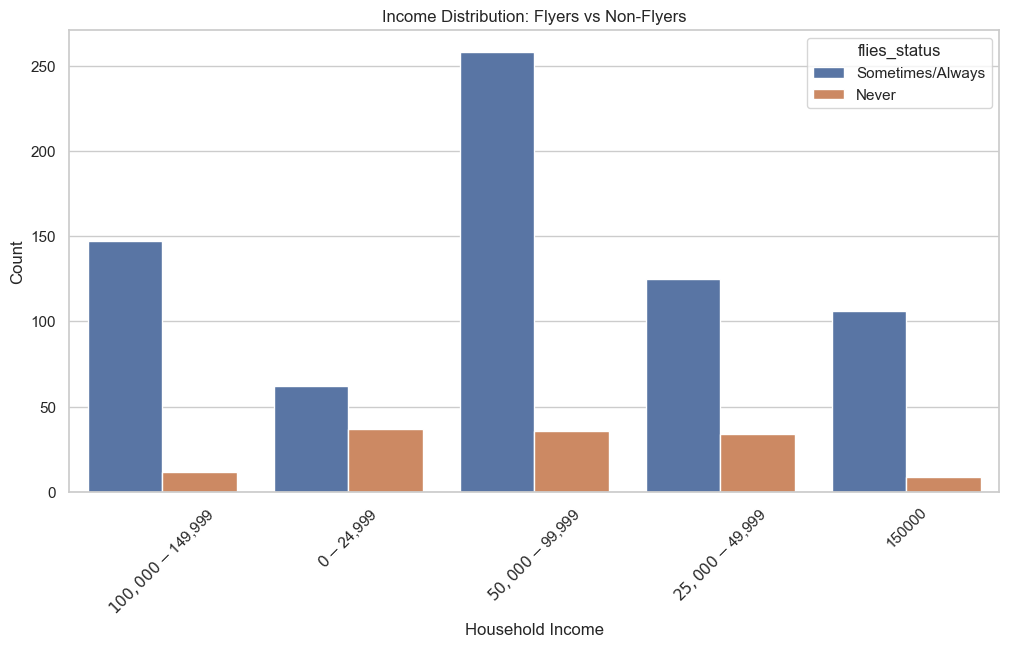

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Household Income', hue='flies_status', data=demographic_data)
plt.title('Income Distribution: Flyers vs Non-Flyers')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The bar chart displays the distribution of individuals categorized by household income and their flying behavior.
The x-axis represents different income brackets (e.g., ‘100,000+’, ‘0 - 24,999’, ‘50,000 - 99,999’, ‘25,000 - 49,999’, and ‘<10000’).
The y-axis represents the count of individuals.
- Each income bracket has two segments within its respective bar:
“Sometimes”, “Never”
- The highest count of individuals who sometimes fly is in the ‘50,000 - 99,999’ income bracket.
- Individuals with an income of ‘<10000’ have the lowest count for both flyers and non-flyers.
- In every income bracket except ‘<10000’, there are more individuals who sometimes fly than those who never fly.
- Income does not seem to significantly impact air travel behavior in this dataset.

- **Similarities:** The income categories show that individuals across different income levels do fly.

- **Disparities:** There's a noticeable difference in the '50,000–99,999' income bracket, where a significantly larger number of individuals are flyers. This disparity suggests a correlation between income levels and the likelihood of flying, with mid to higher income individuals flying more often than those in lower income brackets. It could indicate that income level is a factor in flying frequency, with higher income possibly enabling more frequent travel.

## Flyers: Demographic "Drill-down"

**1. Visualize the distribution of responses for different age groups.**

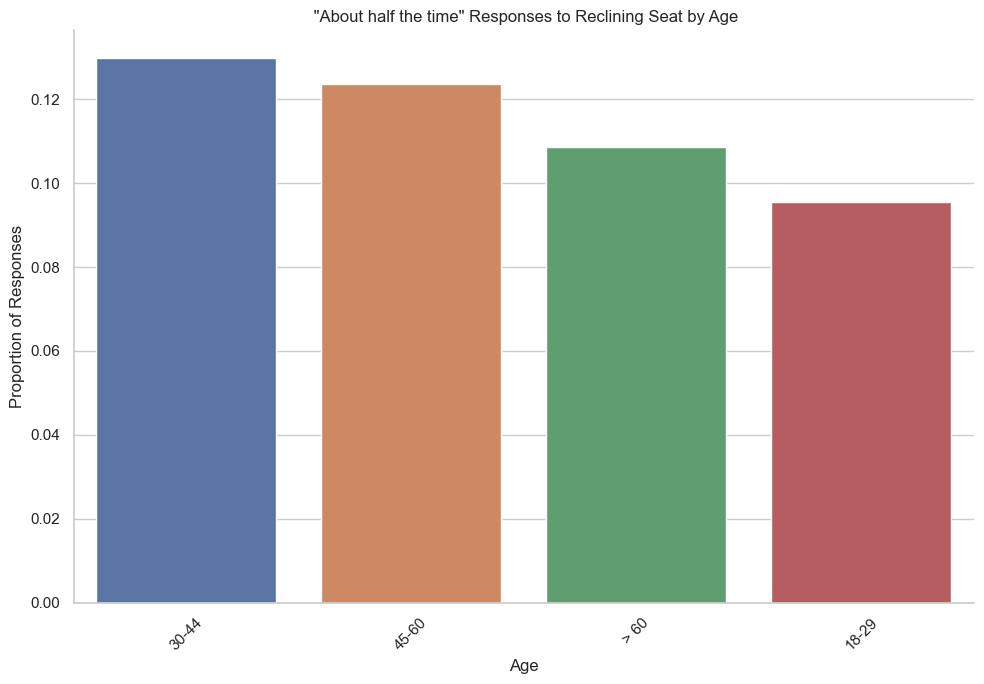

In [65]:
age_group_response = data[data['Do you ever recline your seat when you fly?'] == 'About half the time'].groupby('Age').size() /data.groupby('Age').size()

# Convert the series to a DataFrame
age_group_response_data = age_group_response.reset_index(name='proportion')

# Sort the DataFrame based on the proportion to find out the highest likelihood
age_group_response_data.sort_values('proportion', ascending=False, inplace=True)

# Creating the publication-quality plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Age', y='proportion', data=age_group_response_data)
plt.title(' "About half the time" Responses to Reclining Seat by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Responses')
plt.xticks(rotation=45)  
sns.despine()

plt.tight_layout()  
plt.show()


- The graph displays the proportion of responses from different age groups regarding reclining seats during flights. Four age groups are represented: 30-44, 45-60, >60, and 18-29.
- Each vertical bar corresponds to an age group and indicates the frequency of responding “About half the time.”
Key Observations:
- The 30-44 age group has the highest proportion of responses in the “About half the time” category.
This group seems to strike a balance between reclining their seats and not reclining, opting for a middle-ground approach.
- Other age groups (45-60, >60, and 18-29) have lower proportions in the same category.

**2. Compare the distribution of responses between male and female flyers.**

In [66]:
responded_yes = data[data['Do you have any children under 18?'] == 'Yes']
gender_yes_count = responded_yes['Gender'].value_counts()

In [67]:
gender_yes_count

Gender
Female    94
Male      93
Name: count, dtype: int64

In [68]:
total_gender_counts = data['Gender'].value_counts()

In [69]:
total_gender_counts

Gender
Female    528
Male      479
Name: count, dtype: int64

In [70]:
gender_yes_respond = gender_yes_count/total_gender_counts

In [71]:
gender_yes_respond

Gender
Female    0.178030
Male      0.194154
Name: count, dtype: float64

In [72]:
gender_yes_respond= gender_yes_respond.reset_index(name='proportion')
gender_yes_respond.rename(columns={'index': 'Gender'}, inplace=True)

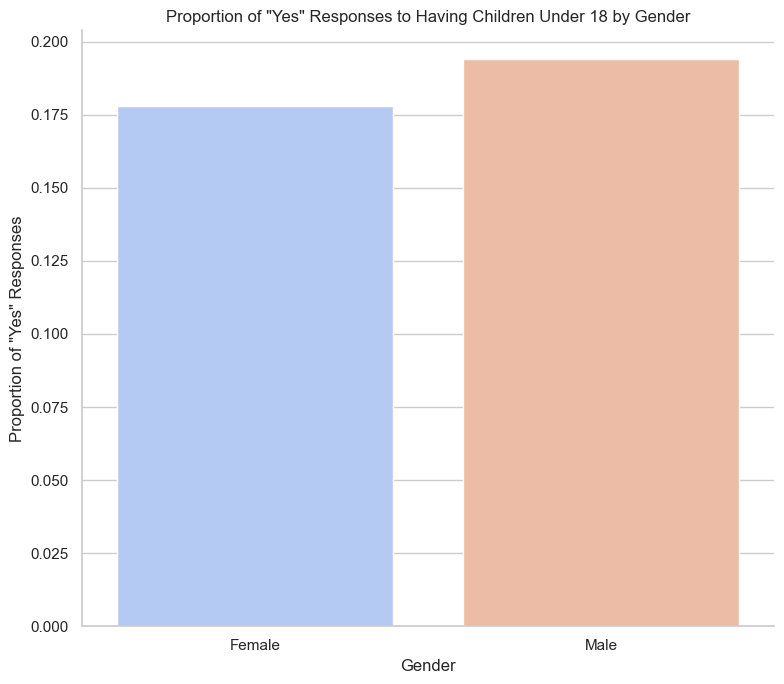

In [73]:
plt.figure(figsize=(8, 7))
sns.barplot(x='Gender', y='proportion', data=gender_yes_respond, palette='coolwarm')
plt.title('Proportion of "Yes" Responses to Having Children Under 18 by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of "Yes" Responses')

# Removing the top and right spines for a cleaner look
sns.despine()

plt.tight_layout()

- The graph displays the proportion of responses from different genders regarding having children under 18.
- The Female bar (in blue) reaches approximately 0.175 on the y-axis, indicating the proportion of female respondents who answered “Yes.”
The Male bar (in purple) extends above 0.175 on the y-axis, showing a higher proportion of male respondents answering “Yes” compared to females.
- The y-axis is labeled as “Proportion of ‘Yes’ Responses,” ranging from 0.000 to 0.200.
The x-axis is labeled as “Gender,” with categories for Female and Male.
- Observations:
Male flyers are more likely to have responded “Yes” to having children under 18.
The difference in proportions suggests that male respondents are more likely to be parents of children under 18

**3. Visualize the distribution of responses across different income groups.**

In [74]:
window_seat_control = data[data['Who should have control over the window shade?'] == 'The person in the window seat should have exclusive control']

In [75]:
income_group_response_counts = window_seat_control['Household Income'].value_counts()

In [76]:
income_group_response_counts

Household Income
$50,000 - $99,999      109
$100,000 - $149,999     57
$25,000 - $49,999       55
150000                  47
$0 - $24,999            31
Name: count, dtype: int64

In [77]:
total_income_group_counts = data['Household Income'].value_counts()

In [78]:
total_income_group_counts

Household Income
$50,000 - $99,999      294
$100,000 - $149,999    159
$25,000 - $49,999      159
150000                 115
$0 - $24,999            99
Name: count, dtype: int64

In [79]:
income_group_response_proportions = income_group_response_counts / total_income_group_counts

In [80]:
income_group_response_proportions

Household Income
$50,000 - $99,999      0.370748
$100,000 - $149,999    0.358491
$25,000 - $49,999      0.345912
150000                 0.408696
$0 - $24,999           0.313131
Name: count, dtype: float64

In [81]:
income_group_response_proportions= income_group_response_proportions.reset_index(name='proportion')
income_group_response_proportions.rename(columns={'index': 'Household Income'}, inplace=True)

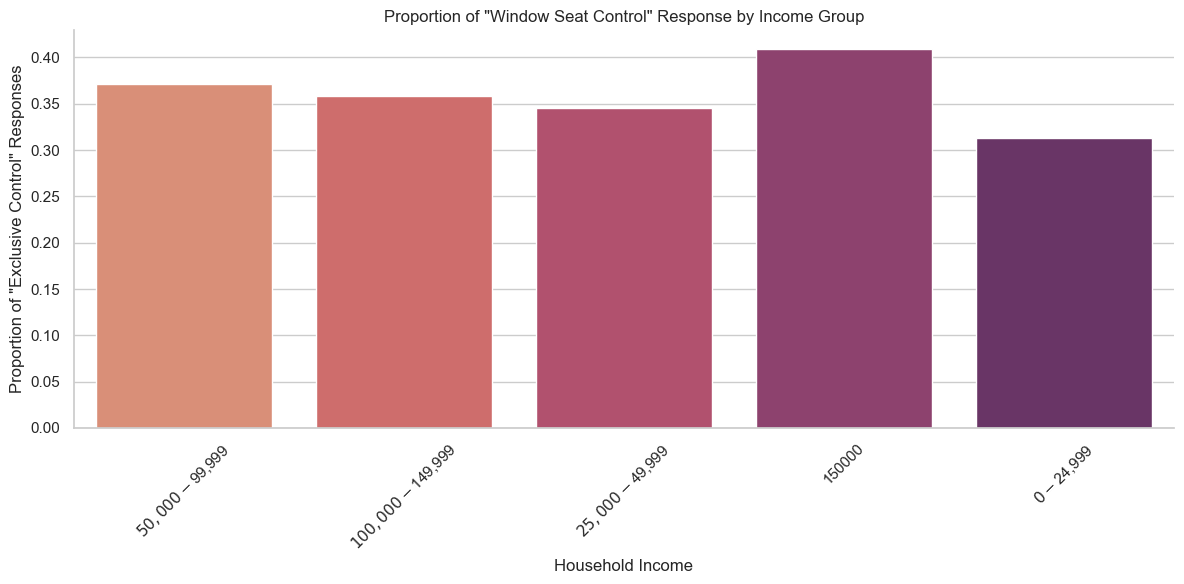

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Household Income', y='proportion', data=income_group_response_proportions, palette='flare')
plt.title('Proportion of "Window Seat Control" Response by Income Group')
plt.xlabel('Household Income')
plt.ylabel('Proportion of "Exclusive Control" Responses')
plt.xticks(rotation=45)  
sns.despine()

plt.tight_layout()

 - The graph displays the proportion of responses from different income groups regarding who should have control over the window shade.
   - Five income groups are represented: '0 - 24,999', '25,000 - 49,999', '50,000 - 99,999', '100,000 - 149,999', and '150,000+'.
   - Each vertical bar corresponds to an income group and indicates the proportion of respondents favoring exclusive control.

- **Observations:** The income group with household income of "0 - 24,999" has the lowest proportion of respondents favoring exclusive control. As income increases, the proportion of respondents favoring exclusive control generally rises.

- Individuals in the lower income bracket (under 25,000) are less likely to believe that the person in the window seat should have exclusive control over the window shade.



**4. Examine the distribution of responses among different locations.**

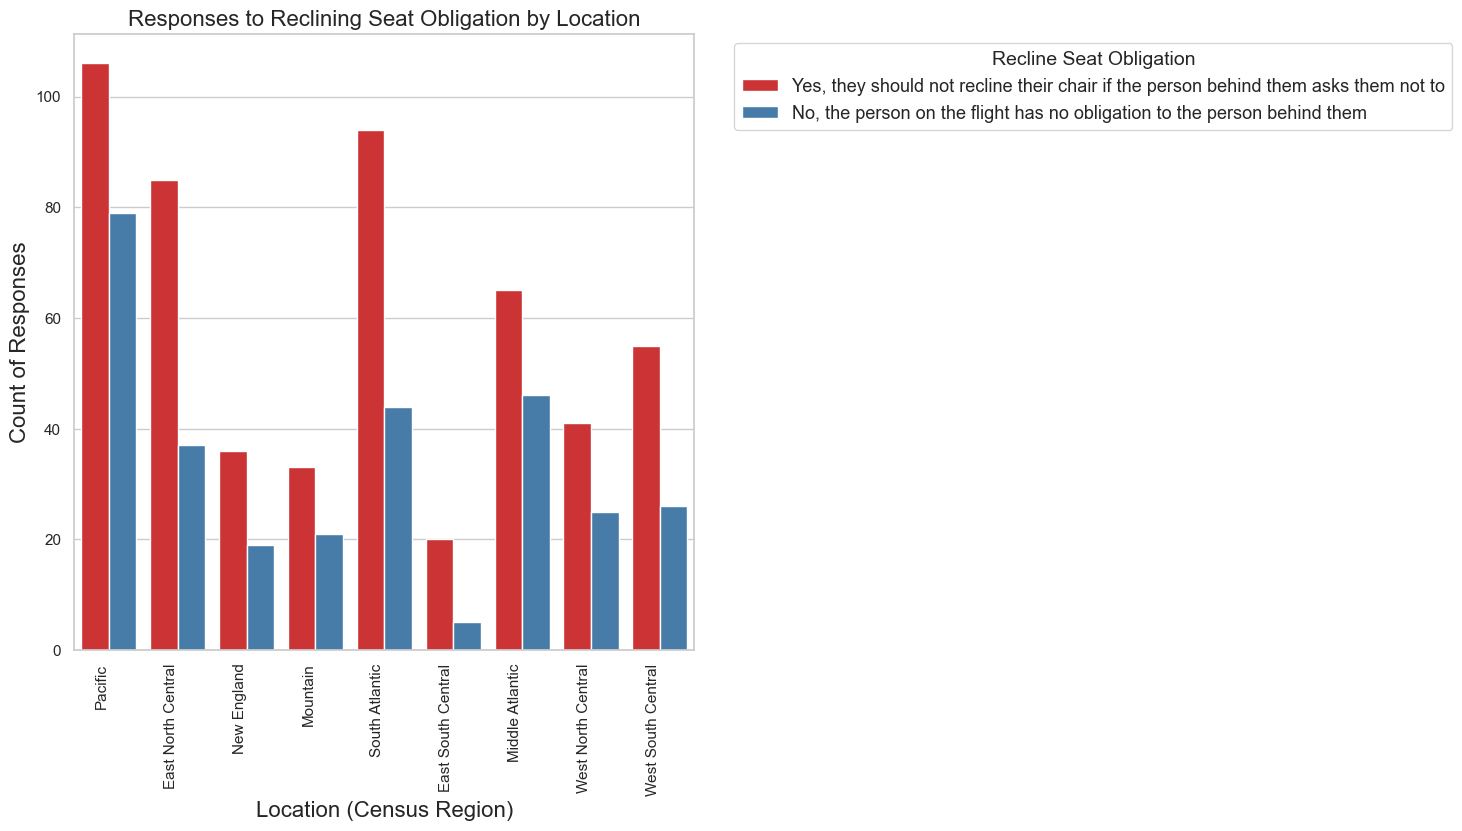

In [83]:
sns.set_style("whitegrid")

# Creating a grouped bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Location (Census Region)', hue='Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?', data=data, palette='Set1')

# Adding title and labels
plt.title('Responses to Reclining Seat Obligation by Location', fontsize=16)
plt.xlabel('Location (Census Region)', fontsize=16)
plt.ylabel('Count of Responses', fontsize=16)
plt.xticks(rotation=90, ha="right")  
plt.legend(title='Recline Seat Obligation', title_fontsize='14', fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- The graph displays the count of responses from different census regions in America regarding whether a person who reclines their seat during a flight has any obligation to the person sitting behind them.
- Each census region is represented, and respondents were asked to choose between two options:
“Yes, they should not recline their chair if the person behind them asks them not to.”
“No, the person on the flight has no obligation to the person behind them.”
- Observations:
  Pacific, East North Central, East South Central, Middle Atlantic, Mountain, New England, South Atlantic, West North Central & West South Central: A majority agreed that passengers should not recline their chair if asked not to by the person behind. 
- Interpretation:

**Entire Country:** A majority agreed that passengers should not recline their chair if the person behind asks them not to.
Regional differences exist in opinions regarding seat reclining obligations.

**5. Compare the responses between male and female flyers.**

In [84]:
no_rude_response = data[data['Is it rude to wake a passenger up if you are trying to go to the bathroom?'] == 'No, not at all rude']

In [85]:
total_response_by_gender = data['Gender'].value_counts()

In [86]:
total_response_by_gender

Gender
Female    528
Male      479
Name: count, dtype: int64

In [87]:
no_rude_response_by_gender = no_rude_response['Gender'].value_counts()

In [88]:
no_rude_response_by_gender

Gender
Male      272
Female    261
Name: count, dtype: int64

In [89]:
proportion_no_rude_by_gender = (no_rude_response_by_gender / total_response_by_gender).reset_index()

In [90]:
proportion_no_rude_by_gender

,Gender,count
0,Female,0.494318
1,Male,0.567850


In [91]:
proportion_no_rude_by_gender.columns = ['Gender', 'Proportion']

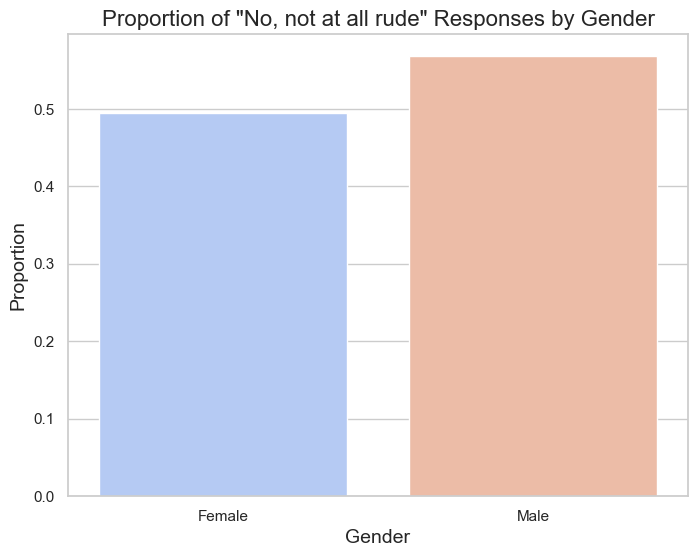

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Proportion', data=proportion_no_rude_by_gender, palette='coolwarm')
plt.title('Proportion of "No, not at all rude" Responses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

- The graph displays the proportion of responses from different genders regarding whether it is rude to wake a passenger up if you are trying to go to the bathroom during a flight. Two bars represent the genders: Female and Male.
- Respondents were asked to choose between two options:
“No, not at all rude”: Indicates that waking a passenger up is not considered rude.
Other responses: Not shown in the graph but would include responses indicating rudeness.
- The y-axis represents the proportion of “No, not at all rude” responses, ranging from 0.0 to 0.5.
The x-axis shows the gender categories.
- Observations:
Males are more likely to have responded “No, not at all rude.”
The orange bar (representing males) reaches slightly higher on the proportion scale compared to the blue bar (representing females).
- Thus a larger proportion of males do not find it rude to wake a passenger up when going to the bathroom during a flight.

**6. Calculate the average height for male and female survey respondents.**

In [93]:
average_height_by_gender = demographic_data.groupby('Gender')['Height in cm'].mean().reset_index()

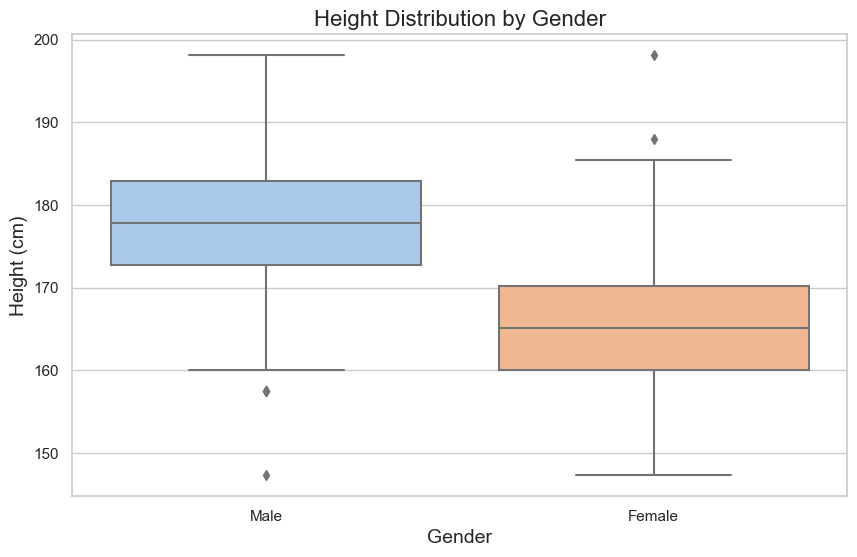

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height in cm', data=demographic_data, palette='pastel')
plt.title('Height Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)
plt.show()

- The graph displays the height distribution for male and female survey respondents.
Two box plots represent the genders: Male and Female.
The y-axis represents height in centimeters (ranging from 150 to 190 cm).
The x-axis shows the gender categories.

- Male Respondents:
The median height (middle value) for males is approximately 175 cm.
The interquartile range (IQR) extends from about 170 cm to 180 cm.
There are two outliers below the lower whisker, indicating two male individuals with heights significantly below the main group.

- Female Respondents:
The median height for females is approximately 165 cm.
The IQR extends from about 160 cm to 170 cm.
There is one outlier above the upper whisker, indicating one female individual with a height significantly above the main group.

- Interpretation:
On average, male survey respondents are taller than female survey respondents.
The box plots show the central tendency (median) and variability (IQR) of height within each gender group.
Outliers suggest that there are individuals with heights significantly different from the majority.

**7. Examine the demographic characteristics of individuals who responded "No, not at all rude".**

In [95]:
no_rude_respondent = data[data['In general, is it rude to knowingly bring unruly children on a plane?'] == 'No, not at all rude']

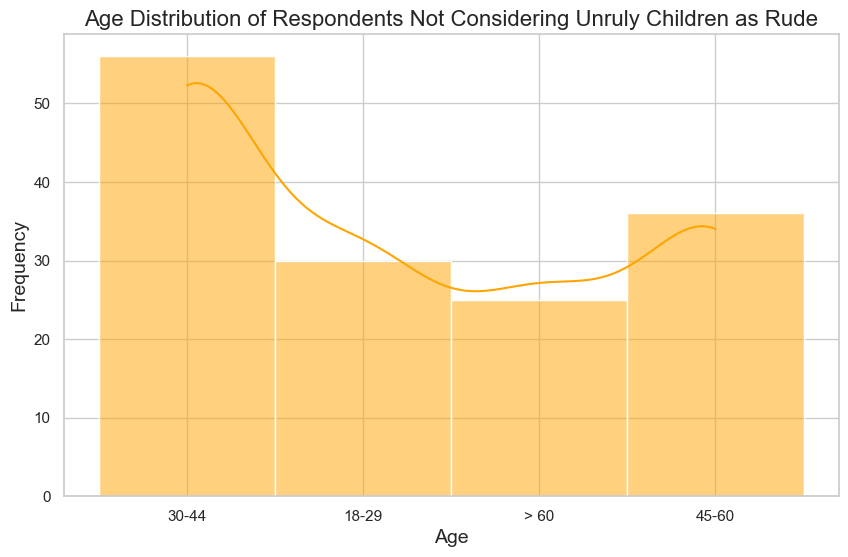

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(no_rude_respondent['Age'], kde=True, color='orange', bins=20)
plt.title('Age Distribution of Respondents Not Considering Unruly Children as Rude', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

- The graph displays the age distribution of individuals who responded “No, not at all rude” to the question about knowingly bringing unruly children on a plane.
- Different age groups are represented: 18-29, 30-44, >60, and 45-60.
The y-axis represents the frequency of respondents falling into each age group, ranging from 0 to 50.

**Observations:**
- The 30-44 age group has the highest frequency of respondents who do not consider bringing unruly children on a plane as rude.
- The 18-29 and 45-60 age groups also show significant frequencies.
Very few respondents over the age of 60 share this opinion.
- Individuals in their 30s and 40s are more tolerant of unruly children on planes

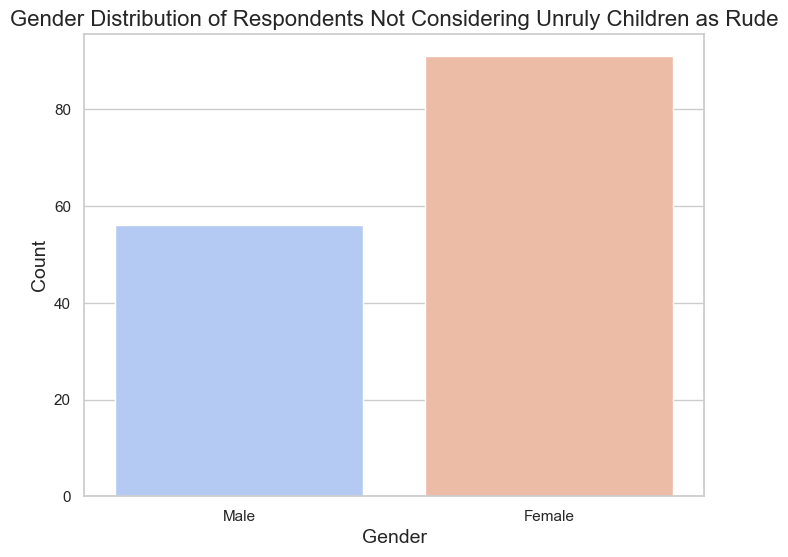

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=no_rude_respondent, palette='coolwarm')
plt.title('Gender Distribution of Respondents Not Considering Unruly Children as Rude', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

- The graph displays the gender distribution of respondents who do not consider bringing unruly children on a plane as rude.
- Two bars represent the genders: Male and Female.
The y-axis represents the count of respondents, ranging from 0 to 80.
- Observations:
Females are more likely to have responded “No, not at all rude.”
- The orange bar (representing females) reaches a count of approximately 70, indicating a larger number of female respondents holding this view.
The blue bar (representing males) reaches a count of approximately 50.
- Interpretation:
This shows that a higher proportion of female respondents do not find it rude to bring unruly children on a plane.

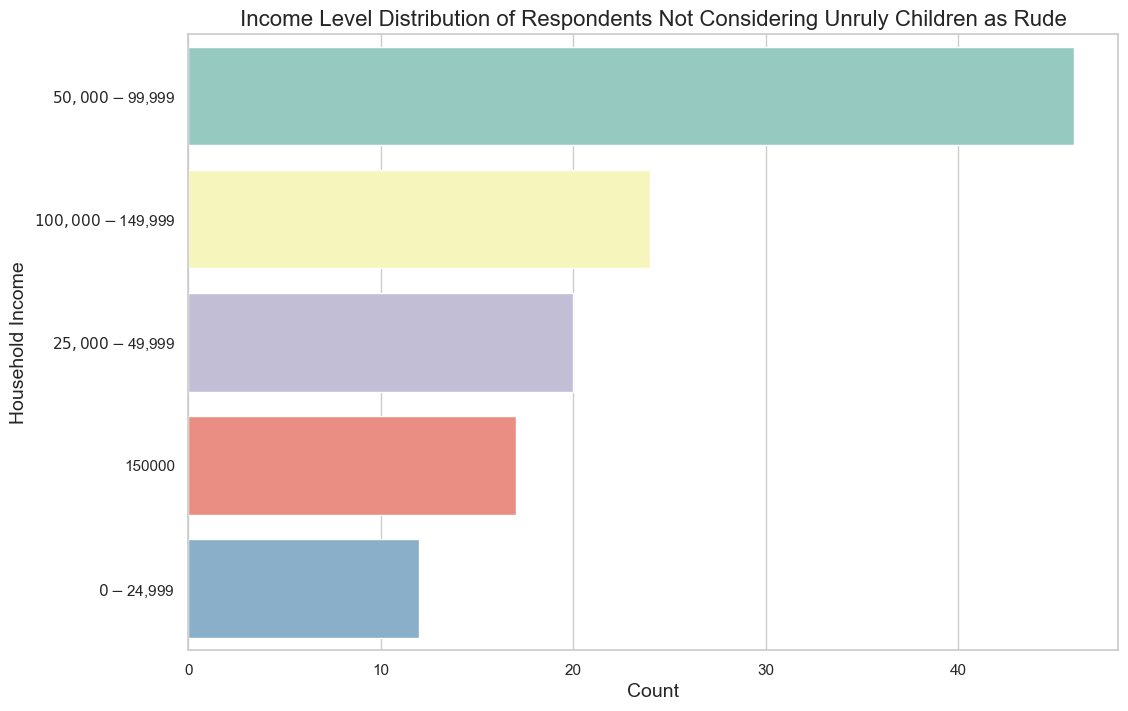

In [98]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Household Income', data=no_rude_respondent, palette='Set3', order=no_rude_respondent['Household Income'].value_counts().index)
plt.title('Income Level Distribution of Respondents Not Considering Unruly Children as Rude', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Household Income', fontsize=14)
plt.show()

  - The graph displays the distribution of respondents based on their household income levels.  
- Income Levels:
   - The y-axis represents the income levels in dollars.
   - The x-axis represents the count of respondents falling into each income category.

- Bar Details:
   - 0–24,999:A small number (approx 10) of respondents fall into this income range.
   - 25,000–49,999: Approximately 15 respondents have an income level within this range.
   - 100,000–149,999:  A significant number (just below 30) of respondents fall into this income category.
   - 50,000-99,999:The majority (over 30) of respondents have an income level between 100,000 and 149,999.

- Observations:
   - The graph indicates that individuals across various income levels responded similarly regarding unruly children on planes.
   - The majority of respondents who do not consider unruly children as rude have a moderate to high income level.


## Summary

After analyzing the dataset, several insights have been gathered:

- The age group most likely to recline their seat "About half the time" comprises individuals in their late 20s to early 40s.
- Female flyers are more likely to have children under 18 compared to male flyers.
- Respondents with higher incomes are less likely to believe that the person in the window seat should have exclusive control over the window shade.
- There are variations in opinions regarding the obligation of reclining seat behavior based on the location of respondents.
- Female flyers are more likely than male flyers to consider it not rude to wake a passenger up to go to the bathroom.
- On average, male survey respondents are taller than female survey respondents.
- Individuals who do not consider it rude to knowingly bring unruly children on a plane tend to have a diverse demographic profile, indicating that this perception is not limited to any specific group.
  

# Recommendations

- **Encouraging Infrequent Flyers:**
Develop initiatives aimed at encouraging those who "Never fly" or fly infrequently to consider air travel more often. This could involve targeted promotions, educational content on the ease and safety of air travel, and partnerships with tourism boards to inspire travel.

- **Customer Feedback Mechanisms:**
Implement or enhance mechanisms for collecting direct feedback from passengers on their in-flight experience. This can help continuously refine and adjust services to meet evolving customer expectations.

- **Data-Driven Service Design:**
Airlines may better serve their passengers and increase happiness and loyalty by customising in-flight experiences through the use of data-driven service designs based on demographic and preference analysis. Airlines could adapt to a wide range of passenger preferences by utilising technology-enhanced comforts, flexible policies, and insights into personalised services. Agile changes are made possible by continuous feedback loops, which guarantee that services change in line with client expectations. This strategy gives passengers a better experience and gives airlines a competitive edge in the market.



# Conclusion

The results of this extensive questionnaire provide important new insights into the preferences and expectations of airline passengers with regard to in-flight manners and the overall experience. Airlines can increase customer happiness and build loyalty by adopting a data-driven approach to policy formation, communication, and service design innovation. This kind of strategic alignment guarantees a more customised and enjoyable flying experience by not only forecasting but also meeting the varied needs of passengers. This proactive strategy for recognising and attending to passenger demands highlights the airline's dedication to providing exceptional customer service, establishing a standard for the sector and giving it a competitive advantage in the global aviation market.
